<a href="https://colab.research.google.com/github/jeqcho/reproduce-faculty-gender-ratings/blob/main/course_ratings_analysis_fall_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


pd.options.display.max_columns = None
df = pd.read_csv('verbose_course_ratings.csv')
df.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,max_sent_score,min_sent_score,max_gem_score,course_id
count,1408.000000,1408.00000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.0,1408.0,1408.000000,1408.000000,1408.000000,1408.000000,946.000000
mean,29.865057,37.96946,4.323494,4.474787,4.558239,0.684444,4.516413,4.697443,4.715199,0.481738,6.189936,5.639560,6.074574,2.844205,4.292678,4.467330,4.529119,0.732884,0.619072,0.708698,0.542101,0.230192,0.007698,0.0,0.0,-0.046880,0.898777,-0.207576,0.092224,145268.678647
std,55.458407,66.75006,0.530065,0.653760,0.744191,0.329346,0.698429,0.739345,0.808095,0.422868,3.230577,3.045594,3.970321,1.765164,0.513801,0.603235,0.691509,0.340504,0.233406,0.251636,0.428086,0.392594,0.031738,0.0,0.0,0.290176,0.201353,0.303748,0.276029,41553.172414
min,5.000000,5.00000,1.830000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,2.000000,2.000000,1.000000,0.000000,-0.699700,-0.699700,-0.954400,-1.000000,-0.100000,0.0,0.0,-1.000000,0.000000,-0.990900,0.000000,188.000000
25%,8.000000,10.00000,4.050000,4.000000,4.000000,0.460566,4.380000,5.000000,5.000000,0.000000,4.000000,4.000000,3.000000,1.557500,4.000000,4.000000,4.000000,0.520000,0.510509,0.629250,0.000000,0.162628,0.000000,0.0,0.0,0.000000,0.916800,-0.421350,0.000000,115470.000000
50%,13.000000,15.00000,4.410000,5.000000,5.000000,0.703526,4.710000,5.000000,5.000000,0.464823,5.530000,5.000000,5.000000,2.430000,4.380000,5.000000,5.000000,0.770000,0.655368,0.789925,0.709600,0.322522,0.000000,0.0,0.0,0.000000,0.972500,0.000000,0.000000,123159.500000
75%,28.000000,36.00000,4.730000,5.000000,5.000000,0.935441,4.930000,5.000000,5.000000,0.771222,8.000000,7.000000,8.000000,3.720000,4.670000,5.000000,5.000000,0.960000,0.792795,0.883962,0.912050,0.441265,0.000000,0.0,0.0,0.000000,0.987700,0.000000,0.000000,203024.750000
max,656.000000,772.00000,5.000000,5.000000,5.000000,1.580947,5.000000,5.000000,5.000000,1.766977,25.000000,25.000000,30.000000,12.450000,5.000000,5.000000,5.000000,2.080000,0.984900,0.989900,0.996300,1.250589,0.333333,0.0,0.0,0.577350,0.999800,0.000000,0.997100,220865.000000


In [ ]:
df.dtypes

course_code                object
course_title               object
course_teacher             object
link                       object
fas_code                   object
unique_code                object
num_responded             float64
num_students              float64
course_score_mean         float64
course_score_median       float64
course_score_mode         float64
course_score_stdev        float64
lecturer_score_mean       float64
lecturer_score_median     float64
lecturer_score_mode       float64
lecturer_score_stdev      float64
workload_score_mean       float64
workload_score_median     float64
workload_score_mode       float64
workload_score_stdev      float64
rec_score_mean            float64
rec_score_median          float64
rec_score_mode            float64
rec_score_stdev           float64
sentiment_score_mean      float64
sentiment_score_median    float64
sentiment_score_mode      float64
sentiment_score_stdev     float64
gem_score_mean            float64
gem_score_medi

In [ ]:
df['course_id']

0       123591.0
1       118883.0
2       218819.0
3            NaN
4       220490.0
          ...   
1405    205489.0
1406    207804.0
1407    216115.0
1408    216815.0
1409    156950.0
Name: course_id, Length: 1410, dtype: float64

In [ ]:
df['course_id'].fillna(-1,inplace=True)
df['course_id'] = df['course_id'].astype(int).astype(str)

In [ ]:
df['course_identifier'] = df['course_code'] + ' ' + df['course_title']
df = df.drop_duplicates(subset='course_identifier', keep="first")

In [ ]:
df.nlargest(5,'sentiment_score_mean')

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier
221,CHNSHIS 234R,The Historiography of Early Chinese History 01,Puett,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-114371-2228-1-1-01,FAS-114371-2228-1-1-01(Puett),7.0,14.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,7.00,6.0,10.0,2.65,5.00,5.0,5.0,0.00,0.984900,0.9849,0.9849,-1.000000,0.0,0.0,0.0,-1.0,"This was such an amazing, amazing course! I th...",0.9849,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHNSHIS 234R The Historiography of Early Chine...
1246,RELIGION 1084,Encountering Motherhood: Sacred Histories 01,Patton,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-211228-2228-1-1-01,FAS-211228-2228-1-1-01(Patton),6.0,7.0,5.00,5.0,5.0,0.000000,4.80,5.0,5.0,0.402015,7.00,6.5,10.0,2.53,4.83,5.0,5.0,0.41,0.983500,0.9835,0.9873,0.005374,0.0,0.0,0.0,0.0,"TAKE THIS CLASS, its so intersectional in so m...",0.9873,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RELIGION 1084 Encountering Motherhood: Sacred ...
1158,PHIL 169W,The Philosophy of Bernard Williams (proseminar...,Moran,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-220569-2228-1-1-001,FAS-220569-2228-1-1-001(Moran),6.0,6.0,4.50,4.5,4.0,0.502519,4.25,4.5,5.0,0.833333,4.75,5.0,5.0,1.26,4.50,4.5,4.0,0.58,0.980200,0.9802,0.9802,-1.000000,0.0,0.0,0.0,-1.0,"Before this class, I knew nothing about Bernar...",0.9802,NaN,0.0,NaN,0.0,220569,For Undergraduate and Graduate Students,Philosophy,Philosophy,NaN,Arts and Humanities,NaN,Seminar,The Philosophy of Bernard Williams (proseminar),PHIL 169W The Philosophy of Bernard Williams (...
403,ENGLISH 90RV,"Empire and Revolution, Sex and Gender, Race, S...",Engell,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-220049-2228-1-1-001,FAS-220049-2228-1-1-001(Engell),5.0,7.0,4.60,5.0,5.0,0.492366,4.80,5.0,5.0,0.402015,5.80,7.0,7.0,2.39,4.60,5.0,5.0,0.55,0.974200,0.9742,0.9742,-1.000000,0.0,0.0,0.0,-1.0,This class was excellent: a well–curated selec...,0.9742,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ENGLISH 90RV Empire and Revolution, Sex and Ge..."
566,FRSEMR 62I,Major English and American Poets: Human Predic...,Rudenstine,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-207763-2228-1-1-001,FAS-207763-2228-1-1-001(Rudenstine),8.0,9.0,4.71,5.0,5.0,0.456048,5.00,5.0,5.0,0.000000,2.20,3.0,3.0,1.10,4.71,5.0,5.0,0.49,0.972067,0.9806,0.9806,0.029539,0.0,0.0,0.0,0.0,This course is lovely. Professor Rudenstine kn...,0.9964,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRSEMR 62I Major English and American Poets: H...


In [ ]:
dftest = df.sample(20)
dftest.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,max_sent_score,min_sent_score,max_gem_score
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.000000,20.000000,20.000000,20.000000
mean,30.850000,38.550000,4.561500,4.850000,4.900000,0.602630,4.540000,4.700000,4.700000,0.312556,5.974500,5.425000,5.650000,2.985000,4.501500,4.750000,4.800000,0.643000,0.656000,0.749475,0.664430,0.187090,0.007693,0.0,0.0,-0.058820,0.892420,-0.243290,0.149270
std,43.422375,49.413907,0.277209,0.366348,0.307794,0.286640,1.095426,1.128576,1.128576,0.448626,2.112463,2.231798,2.560325,1.731545,0.278384,0.444262,0.410391,0.271295,0.238520,0.243175,0.401643,0.435247,0.025076,0.0,0.0,0.334497,0.238295,0.336794,0.327268
min,5.000000,7.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,3.180000,3.000000,3.000000,0.690000,3.910000,4.000000,4.000000,0.000000,0.000000,0.000000,-0.401900,-1.000000,0.000000,0.0,0.0,-1.000000,0.000000,-0.959700,0.000000
25%,8.000000,10.750000,4.435000,5.000000,5.000000,0.446119,4.612500,5.000000,5.000000,0.000000,4.602500,3.750000,3.750000,1.945000,4.305000,4.750000,5.000000,0.485000,0.532531,0.710550,0.482300,0.103557,0.000000,0.0,0.0,0.000000,0.922425,-0.446975,0.000000
50%,17.000000,25.500000,4.585000,5.000000,5.000000,0.638928,4.845000,5.000000,5.000000,0.363130,5.445000,5.000000,5.000000,2.705000,4.520000,5.000000,5.000000,0.725000,0.681020,0.834325,0.887950,0.320124,0.000000,0.0,0.0,0.000000,0.983500,0.000000,0.000000
75%,25.750000,32.500000,4.727500,5.000000,5.000000,0.752658,5.000000,5.000000,5.000000,0.581245,7.025000,6.000000,6.500000,3.527500,4.680000,5.000000,5.000000,0.792500,0.837650,0.896650,0.956500,0.446357,0.000000,0.0,0.0,0.000000,0.990050,0.000000,0.000000
max,189.000000,215.000000,5.000000,5.000000,5.000000,1.035677,5.000000,5.000000,5.000000,1.169088,11.830000,11.500000,10.000000,7.760000,5.000000,5.000000,5.000000,1.020000,0.941013,0.963700,0.979400,0.580007,0.111111,0.0,0.0,0.333333,0.998800,0.000000,0.988900


In [ ]:
import re
from nltk import tokenize
import nltk
nltk.download('punkt')

df['best_gem_comment'].fillna('',inplace=True)

def get_short_gem_comment(comment):
  if comment == '':
    return ''
  for sentence in tokenize.sent_tokenize(comment):
    if re.search(r'\bgem\b',sentence.lower()):
      return sentence
  assert False


df['best_gem_comment_short'] = df['best_gem_comment'].apply(get_short_gem_comment)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['course_title_2023'].fillna('',inplace=True)

def get_useful_title(row):
  if row['course_code'].startswith('EXPOS 20'):
    return row['course_title']
  # somehow my.harvard gives an error if the title starts with a single word
  # followed by a colon
  return row['course_title_2023'].replace(':','')


df['useful_title'] = df.apply (lambda row: get_useful_title(row), axis=1)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['best_comment'].fillna('',inplace=True)

def get_short_comment(comment):
  if comment == '':
    return ''
  max_score = 0
  best_short_comment = ''
  for sentence in tokenize.sent_tokenize(comment):
    score = sia.polarity_scores(sentence)['compound']
    if score > max_score:
      max_score = score
      best_short_comment = sentence
  return best_short_comment


df['best_comment_short'] = df['best_comment'].apply(get_short_comment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def get_first_sentece(comment):
  if comment == '':
    return ''
  return tokenize.sent_tokenize(comment)[0]


df['best_comment_first'] = df['best_comment'].apply(get_first_sentece)

In [ ]:
!pip install xlsxwriter
df.to_excel("verbose_course_ratings", engine='xlsxwriter')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


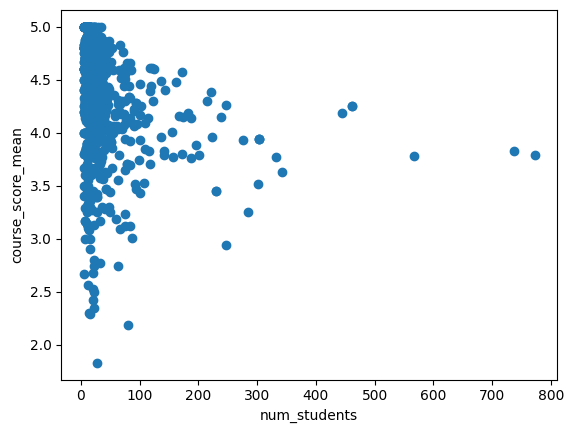

In [ ]:
plt.scatter(df['num_students'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('num_students')
plt.ylabel('course_score_mean')
plt.gca().set_facecolor('white')
# Show the plot
plt.show()

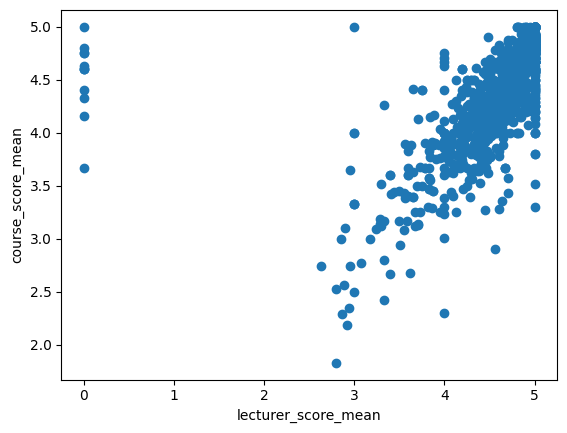

In [ ]:
plt.scatter(df['lecturer_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

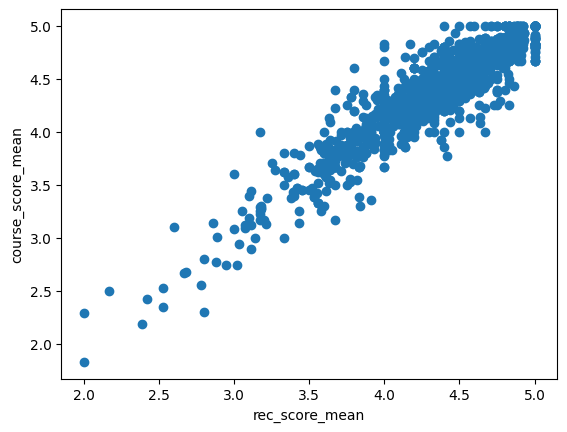

In [ ]:
plt.scatter(df['rec_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('rec_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

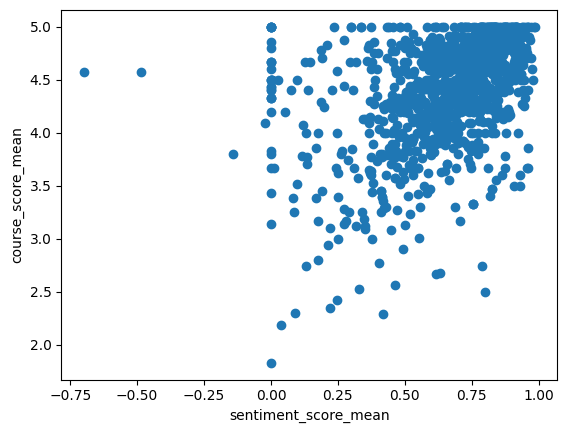

In [ ]:
plt.scatter(df['sentiment_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('sentiment_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

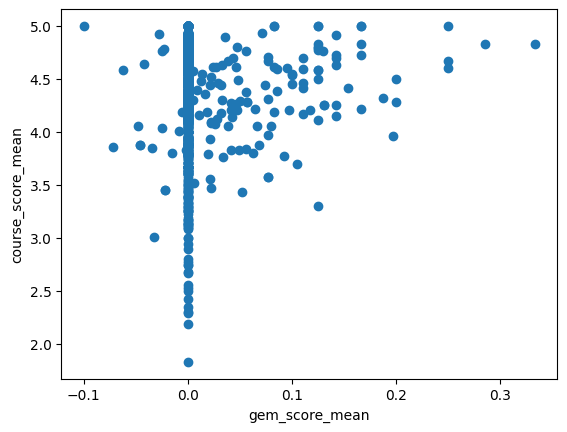

In [ ]:
plt.scatter(df['gem_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

115


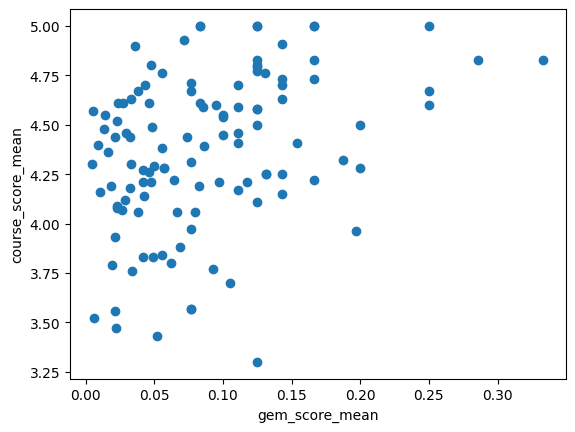

In [ ]:
df_course_gem = df[df['gem_score_mean'] > 0]
df_course_gem = df_course_gem[df_course_gem['gem_score_mean'] < 1]
print(len(df_course_gem))
plt.scatter(df_course_gem['gem_score_mean'], df_course_gem['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

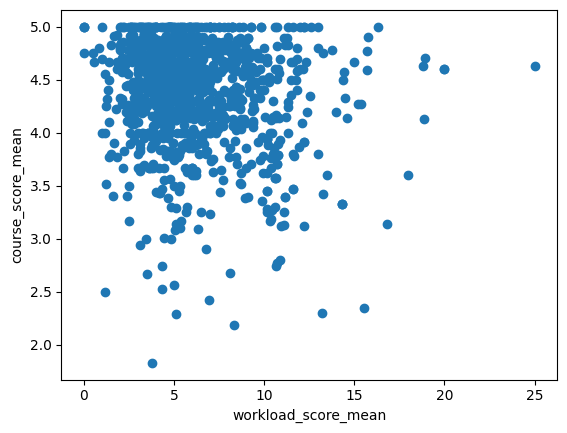

In [ ]:
plt.scatter(df['workload_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

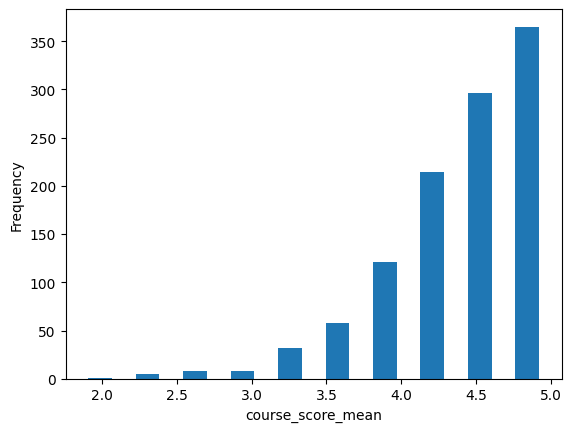

In [ ]:
plt.hist(df['course_score_mean'], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

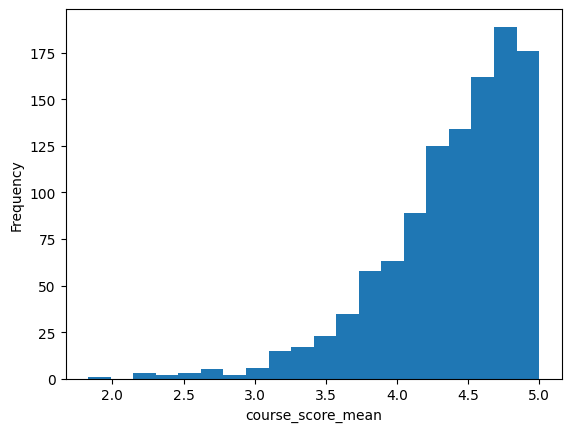

In [ ]:
plt.hist(df['course_score_mean'],bins=20)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

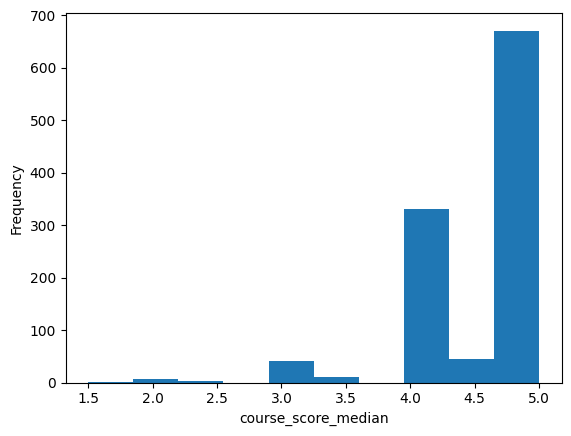

In [ ]:
plt.hist(df['course_score_median'])

# Add x-axis and y-axis labels
plt.xlabel('course_score_median')
plt.ylabel('Frequency')

# Show the plot
plt.show()

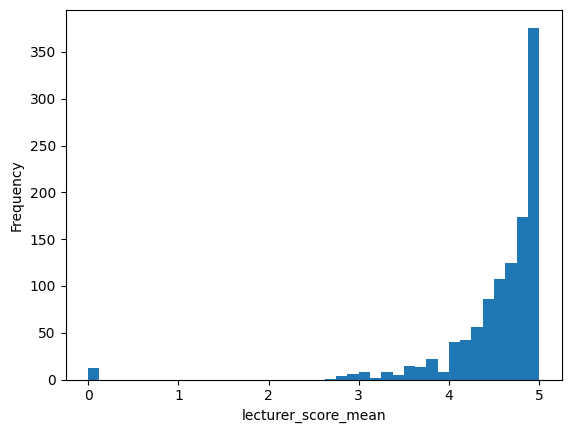

In [ ]:
plt.hist(df['lecturer_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

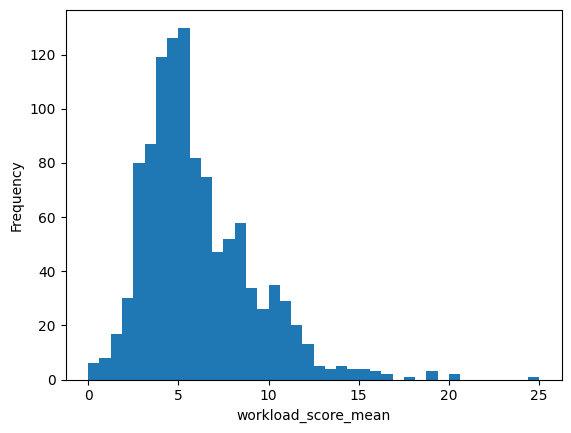

In [ ]:
plt.hist(df['workload_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
df['num_students'].describe()

count    1108.000000
mean       30.140794
std        57.617638
min         5.000000
25%        10.000000
50%        14.000000
75%        26.000000
max       772.000000
Name: num_students, dtype: float64

In [ ]:
import numpy

df_super_gem = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_score_mean'] > 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
]

print(len(df_super_gem))
df_super_gem = df_super_gem.sort_values(by=['gem_score_mean'],ascending=False)
df_super_gem

36


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
1024,MBB 980N,Neuroaesthetics 001,Etcoff,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-161267-2228-1-1-001,FAS-161267-2228-1-1-001(Etcoff),12.0,16.0,4.83,5.0,5.0,0.377525,4.92,5.0,5.0,0.272660,3.08,3.0,2.0,1.16,5.00,5.0,5.0,0.00,0.744500,0.90190,0.0000,0.364081,0.285714,0.0,0.0,0.487950,This is one of my favorite classes I've ever t...,0.9875,NaN,0.0000,"This class is a gem — fascinating topics, wond...",0.9402,161267,Primarily for Undergraduate Students,"Mind, Brain & Behavior","Mind, Brain & Behavior",NaN,Social Sciences,NaN,Seminar,Neuroaesthetics,MBB 980N Neuroaesthetics 001,"This class is a gem — fascinating topics, wond...",Neuroaesthetics,If you have any interest at all in neuroscienc...,This is one of my favorite classes I've ever t...
1228,PSY 1816,Broken Brains: Mechanisms and Markers of Menta...,Pereira Piccolo Ribeiro,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-218525-2228-1-1-001,FAS-218525-2228-1-1-001(Pereira Piccolo Ribeiro),16.0,16.0,4.60,5.0,5.0,0.619326,4.87,5.0,5.0,0.337998,3.07,3.0,4.0,1.16,4.67,5.0,5.0,0.49,0.679300,0.81715,0.2755,0.354287,0.250000,0.0,0.0,0.462910,This class is a gem in the way that it is very...,0.9763,NaN,0.0000,This class is a gem in the way that it is very...,0.9763,218525,For Undergraduate and Graduate Students,Psychology,Psychology,NaN,Science & Engineering & Applied Science,NaN,Seminar,Broken Brains: Mechanisms and Markers of Menta...,PSY 1816 Broken Brains: Mechanisms and Markers...,This class is a gem in the way that it is very...,Broken Brains Mechanisms and Markers of Mental...,I'd definitely recommend this class to anyone ...,This class is a gem in the way that it is very...
1215,PSY 1018,The Science and Psychology of Music 001,Pereira Piccolo Ribeiro,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-218517-2228-1-1-001,FAS-218517-2228-1-1-001(Pereira Piccolo Ribeiro),33.0,36.0,4.32,5.0,5.0,0.930732,4.69,5.0,5.0,0.544857,2.12,2.0,2.0,1.18,4.54,5.0,5.0,0.88,0.757469,0.87680,0.6369,0.283007,0.187500,0.0,0.0,0.403113,TAKE THIS CLASS!!!! Mayron is the absolute bes...,0.9878,Don't take this course if you want to be chall...,-0.0258,THIS COURSE IS A GEM!!! MAYRON AND THE ENTIRE ...,0.9152,218517,For Undergraduate and Graduate Students,Psychology,Psychology,NaN,Social Sciences,NaN,Lecture,The Science and Psychology of Music,PSY 1018 The Science and Psychology of Music 001,THIS COURSE IS A GEM!!!,The Science and Psychology of Music,"Mayron is the absolute best, he is so passiona...",TAKE THIS CLASS!!!!
1138,OEB 104,The Mouse in Science and Society 001,Pritchett-Corning,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-161184-2228-1-1-001,FAS-161184-2228-1-1-001(Pritchett-Corning),23.0,24.0,5.00,5.0,5.0,0.000000,4.95,5.0,5.0,0.219043,2.05,2.0,2.0,1.00,4.90,5.0,5.0,0.30,0.885092,0.93665,0.8065,0.113477,0.166667,0.0,0.0,0.389249,"I really wanted to take a science class, but w...",0.9841,NaN,0.0000,"Wonderful class. Definetly a gem, and the prof...",0.8805,161184,For Undergraduate and Graduate Students,Organismic & Evolutionary Biol,Organismic & Evolutionary Biol,NaN,Science & Engineering & Applied Science,NaN,Lecture,The Mouse in Science and Society,O

In [ ]:
df_super_gem = df_super_gem[df_super_gem['course_code'] != 'EXPOS 20']
df_super_gem

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
1024,MBB 980N,Neuroaesthetics 001,Etcoff,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-161267-2228-1-1-001,FAS-161267-2228-1-1-001(Etcoff),12.0,16.0,4.83,5.0,5.0,0.377525,4.92,5.0,5.0,0.272660,3.08,3.0,2.0,1.16,5.00,5.0,5.0,0.00,0.744500,0.90190,0.0000,0.364081,0.285714,0.0,0.0,0.487950,This is one of my favorite classes I've ever t...,0.9875,NaN,0.0000,"This class is a gem — fascinating topics, wond...",0.9402,161267,Primarily for Undergraduate Students,"Mind, Brain & Behavior","Mind, Brain & Behavior",NaN,Social Sciences,NaN,Seminar,Neuroaesthetics,MBB 980N Neuroaesthetics 001,"This class is a gem — fascinating topics, wond...",Neuroaesthetics,If you have any interest at all in neuroscienc...,This is one of my favorite classes I've ever t...
1228,PSY 1816,Broken Brains: Mechanisms and Markers of Menta...,Pereira Piccolo Ribeiro,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-218525-2228-1-1-001,FAS-218525-2228-1-1-001(Pereira Piccolo Ribeiro),16.0,16.0,4.60,5.0,5.0,0.619326,4.87,5.0,5.0,0.337998,3.07,3.0,4.0,1.16,4.67,5.0,5.0,0.49,0.679300,0.81715,0.2755,0.354287,0.250000,0.0,0.0,0.462910,This class is a gem in the way that it is very...,0.9763,NaN,0.0000,This class is a gem in the way that it is very...,0.9763,218525,For Undergraduate and Graduate Students,Psychology,Psychology,NaN,Science & Engineering & Applied Science,NaN,Seminar,Broken Brains: Mechanisms and Markers of Menta...,PSY 1816 Broken Brains: Mechanisms and Markers...,This class is a gem in the way that it is very...,Broken Brains Mechanisms and Markers of Mental...,I'd definitely recommend this class to anyone ...,This class is a gem in the way that it is very...
1215,PSY 1018,The Science and Psychology of Music 001,Pereira Piccolo Ribeiro,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-218517-2228-1-1-001,FAS-218517-2228-1-1-001(Pereira Piccolo Ribeiro),33.0,36.0,4.32,5.0,5.0,0.930732,4.69,5.0,5.0,0.544857,2.12,2.0,2.0,1.18,4.54,5.0,5.0,0.88,0.757469,0.87680,0.6369,0.283007,0.187500,0.0,0.0,0.403113,TAKE THIS CLASS!!!! Mayron is the absolute bes...,0.9878,Don't take this course if you want to be chall...,-0.0258,THIS COURSE IS A GEM!!! MAYRON AND THE ENTIRE ...,0.9152,218517,For Undergraduate and Graduate Students,Psychology,Psychology,NaN,Social Sciences,NaN,Lecture,The Science and Psychology of Music,PSY 1018 The Science and Psychology of Music 001,THIS COURSE IS A GEM!!!,The Science and Psychology of Music,"Mayron is the absolute best, he is so passiona...",TAKE THIS CLASS!!!!
1138,OEB 104,The Mouse in Science and Society 001,Pritchett-Corning,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-161184-2228-1-1-001,FAS-161184-2228-1-1-001(Pritchett-Corning),23.0,24.0,5.00,5.0,5.0,0.000000,4.95,5.0,5.0,0.219043,2.05,2.0,2.0,1.00,4.90,5.0,5.0,0.30,0.885092,0.93665,0.8065,0.113477,0.166667,0.0,0.0,0.389249,"I really wanted to take a science class, but w...",0.9841,NaN,0.0000,"Wonderful class. Definetly a gem, and the prof...",0.8805,161184,For Undergraduate and Graduate Students,Organismic & Evolutionary Biol,Organismic & Evolutionary Biol,NaN,Science & Engineering & Applied Science,NaN,Lecture,The Mouse in Science and Society,O

In [ ]:
df_super_gem[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
]].to_json('super_gems.json',orient='records')

In [ ]:
department_list = [x for x in df['department'].unique() if str(x)!='nan']
department_list.sort()
import json
with open('department_list.json', "w") as f:
    json.dump(department_list, f)
department_list

['African & African Amer Studies',
 'Anthropology',
 'Applied Computation',
 'Applied Mathematics',
 'Applied Physics',
 'Art, Film, and Visual Studies',
 'Astronomy',
 'Bio Sciences in Public Health',
 'Biomedical Engineering',
 'Biostatistics',
 'Celtic Languages & Literatures',
 'Chemical & Physical Biology',
 'Chemistry & Chemical Biology',
 'Classics, The',
 'Comparative Literature',
 'Computer Science',
 'Earth & Planetary Sciences',
 'East Asian Langs & Civ',
 'Economics',
 'Education Studies',
 'Engineering Sciences',
 'English',
 'Envi Science & Public Policy',
 'Environmental Sci & Engineer',
 'Ethnicity, Migration, Rights',
 'Expository Writing',
 'Folklore & Mythology',
 'General Education',
 'Germanic Languages & Lit',
 'Global Health & Health Policy',
 'Government',
 'Health Policy',
 'History',
 'History & Literature',
 'History of Art & Architecture',
 'History of Science',
 'Human Evolutionary Biology',
 'Humanities',
 'Linguistics',
 'Mathematics',
 'Medical Sciences'

In [ ]:
def get_gems_of_department(department):
  df_gem_of_department = df[
     (df['department'] == department)
  & (df['gem_score_mean'] > 0)
  & (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
  & (df['workload_score_mean'] < 7)
  & (df['course_id'] != '-1')
  ]

  df_gem_of_department = df_gem_of_department.sort_values(by=['gem_score_mean'],ascending=False).head(5)
  df_gem_of_department[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
  ]].to_json('departments/'+department+'.json',orient='records')

In [ ]:
for department in department_list:
  get_gems_of_department(department)

In [ ]:
!zip -r /content/departments.zip /content/departments

  adding: content/departments/ (stored 0%)
  adding: content/departments/Anthropology.json (stored 0%)
  adding: content/departments/Astronomy.json (deflated 45%)
  adding: content/departments/Philosophy.json (deflated 41%)
  adding: content/departments/Chemical & Physical Biology.json (stored 0%)
  adding: content/departments/Biomedical Engineering.json (stored 0%)
  adding: content/departments/Ethnicity, Migration, Rights.json (deflated 39%)
  adding: content/departments/Folklore & Mythology.json (stored 0%)
  adding: content/departments/Near Eastern Languages & Civ.json (stored 0%)
  adding: content/departments/Global Health & Health Policy.json (stored 0%)
  adding: content/departments/Neuroscience.json (deflated 53%)
  adding: content/departments/Population Health Sciences.json (stored 0%)
  adding: content/departments/General Education.json (deflated 58%)
  adding: content/departments/History of Art & Architecture.json (stored 0%)
  adding: content/departments/Medical Sciences.js

In [ ]:
from google.colab import files
files.download("/content/departments.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df[df['department'] == 'Expository Writing']

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
437,EXPOS 10,Introduction to Expository Writing 101,Deli,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-118262-2228-1-1-101,FAS-118262-2228-1-1-101(Deli),7.0,9.0,4.75,5.0,5.0,0.435194,5.00,5.0,5.0,0.000000,5.25,5.5,8.0,3.20,4.50,4.5,4.0,0.58,0.519333,0.57190,0.5719,0.139488,0.0,0.0,0.0,0.0,It's a great introduction to academic essay wr...,0.6249,NaN,0.0000,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 101,,Introduction to Expository Writing,It's a great introduction to academic essay wr...,It's a great introduction to academic essay wr...
438,EXPOS 10,Introduction to Expository Writing 102,Deli,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-118262-2228-1-1-102,FAS-118262-2228-1-1-102(Deli),6.0,10.0,4.83,5.0,5.0,0.377525,4.83,5.0,5.0,0.377525,11.17,8.0,30.0,9.72,4.33,5.0,5.0,1.03,0.367850,0.36785,0.1010,0.377383,0.0,0.0,0.0,0.0,There are definitely a lot of pros and cons to...,0.6347,NaN,0.0000,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 102,,Introduction to Expository Writing,There are definitely a lot of pros and cons to...,There are definitely a lot of pros and cons to...
439,EXPOS 10,Introduction to Expository Writing 103,Given,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-118262-2228-1-1-103,FAS-118262-2228-1-1-103(Given),5.0,9.0,4.20,4.0,4.0,0.402015,4.80,5.0,5.0,0.402015,5.20,5.0,6.0,0.84,3.80,4.0,4.0,0.45,0.000000,0.00000,0.0000,-1.000000,0.0,0.0,0.0,-1.0,,0.0000,NaN,0.0000,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 103,,Introduction to Expository Writing,,
440,EXPOS 10,Introduction to Expository Writing 104,Given,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-118262-2228-1-1-104,FAS-118262-2228-1-1-104(Given),9.0,10.0,4.33,4.0,4.0,0.670059,4.78,5.0,5.0,0.628932,5.75,6.0,8.0,1.91,3.78,4.0,4.0,0.67,0.534600,0.72065,0.6798,0.528258,0.0,0.0,0.0,0.0,This class is well suited for the student who ...,0.9382,"If you are not sure about your writing skills,...",-0.2411,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 104,,Introduction to Expository Writing,This class is well suited for the student who ...,This class is well suited for the student who ...
441,EXPOS 10,Introduction to Expository Writing 105,Hanes,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-118262-2228-1-1-105,FAS-118262-2228-1-1-105(Hanes),8.0,10.0,4.71,5.0,5.0,0.456048,5.00,5.0,5.0,0.000000,5.43,5.0,5.0,1.51,4.71,5.0,5.0,0.49,0.651717,0.81930,0.0000,0.358184,0.0,0.0,0.0,0.0,I was personally not looking forward to Expos ...,0.9603,NaN,0.0000,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction 

In [ ]:
print(len(df[df['course_id']!='-1']))

682


In [ ]:
print(len(df[
    (df['course_id']!='-1')
    &(df['gem_score_mean']>0)
]))

72


In [ ]:
df_great_courses = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_score_mean'] == 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
]

print(len(df_great_courses))
df_great_courses = df_great_courses.sort_values(by=['sentiment_score_mean'],ascending=False)

df_great_courses[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('great_courses.json',orient='records')
df_great_courses

196


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
251,ECON 970,Tutorial - Sophomore Year T08,Gajwani,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-122752-2228-1-1-T08,FAS-122752-2228-1-1-T08(Gajwani),8.0,10.0,5.00,5.0,5.0,0.000000,4.88,5.0,5.0,0.336552,8.63,7.5,6.0,3.46,5.00,5.0,5.0,0.00,0.959880,0.96880,0.9767,0.028849,0.0,0.0,0.0,0.0,Kiran is the best!!! She will go above and bey...,0.9935,NaN,0.0000,,0.0,122752,Primarily for Undergraduate Students,Economics,Economics,NaN,Social Sciences,NaN,Tutorial,Tutorial - Sophomore Year,ECON 970 Tutorial - Sophomore Year T08,,Tutorial - Sophomore Year,I could definitely see how this course can con...,Kiran is the best!!!
884,MATH 155R,Combinatorics 1,Cuenca,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116196-2228-1-1-1,FAS-116196-2228-1-1-1(Cuenca),6.0,7.0,4.80,5.0,5.0,0.402015,4.80,5.0,5.0,0.402015,5.20,5.0,5.0,2.17,4.80,5.0,5.0,0.45,0.952800,0.95280,0.9699,0.024183,0.0,0.0,0.0,0.0,This course was difficult but rewarding! The m...,0.9699,NaN,0.0000,,0.0,116196,For Undergraduate and Graduate Students,Mathematics,Mathematics,NaN,Science & Engineering & Applied Science,NaN,Lecture,Combinatorics,MATH 155R Combinatorics 1,,Combinatorics,It was not the best–organized class I've taken...,This course was difficult but rewarding!
1189,PHYSICS 145,Elementary Particle Physics 001,Hailu,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-117719-2228-1-1-001,FAS-117719-2228-1-1-001(Hailu),7.0,8.0,4.71,5.0,5.0,0.456048,4.67,5.0,5.0,0.472582,10.14,10.0,10.0,4.10,4.57,5.0,5.0,0.53,0.944900,0.98460,0.9951,0.078377,0.0,0.0,0.0,0.0,This class is a really great introduction to p...,0.9951,NaN,0.0000,,0.0,117719,For Undergraduate and Graduate Students,Physics,Physics,Yes,Science & Engineering & Applied Science,NaN,Lecture,Elementary Particle Physics,PHYSICS 145 Elementary Particle Physics 001,,Elementary Particle Physics,Girma was a fun professor since he was so exci...,This class is a really great introduction to p...
199,CHNSE BA,Elementary Modern Chinese 005,Du,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-113873-2228-1-1-005,FAS-113873-2228-1-1-005(Du),13.0,15.0,4.90,5.0,5.0,0.301511,5.00,5.0,5.0,0.000000,6.60,7.0,7.0,1.71,4.80,5.0,5.0,0.63,0.942829,0.97210,0.9840,0.066136,0.0,0.0,0.0,0.0,"If you put your best into your class, you will...",0.9871,NaN,0.0000,,0.0,113873,Primarily for Undergraduate Students,East Asian Langs & Civ,Chinese,NaN,None,NaN,Lecture,Elementary Modern Chinese,CHNSE BA Elementary Modern Chinese 005,,Elementary Modern Chinese,This will make you much sharper answering ques...,"If you put your best into your class, you will..."
217,CHNSE 140A,Advanced Modern Chinese 001,Zhang,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-111129-2228-1-1-001,FAS-111129-2228-1-1-001(Zhang),8.0,8.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,9.83,8.5,5.0,5.71,5.00,5.0,5.0,0.00,0.941325,0.94935,0.9948,0.051169,0.0,0.0,0.0,0.0,"If you're coming from 130a/b, I really encoura...",0.9948,NaN,0.0000,,0.0,111129,For Undergraduate and Graduate Students,East Asian Langs & Civ,Chinese,NaN,Arts and Humanities,NaN,Lecture,Advanced Modern Chinese,CHNSE 140A Advanced Modern Chinese 001,,Advanced Modern Chinese,"After tak

In [ ]:
df_near_gems = df_great_courses[df_great_courses['workload_score_mean']<7]
print(len(df_near_gems))
df_near_gems

139


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
884,MATH 155R,Combinatorics 1,Cuenca,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116196-2228-1-1-1,FAS-116196-2228-1-1-1(Cuenca),6.0,7.0,4.80,5.0,5.0,0.402015,4.80,5.0,5.0,0.402015,5.20,5.0,5.0,2.17,4.80,5.0,5.0,0.45,0.952800,0.95280,0.9699,0.024183,0.0,0.0,0.0,0.0,This course was difficult but rewarding! The m...,0.9699,NaN,0.0000,,0.0,116196,For Undergraduate and Graduate Students,Mathematics,Mathematics,NaN,Science & Engineering & Applied Science,NaN,Lecture,Combinatorics,MATH 155R Combinatorics 1,,Combinatorics,It was not the best–organized class I've taken...,This course was difficult but rewarding!
199,CHNSE BA,Elementary Modern Chinese 005,Du,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-113873-2228-1-1-005,FAS-113873-2228-1-1-005(Du),13.0,15.0,4.90,5.0,5.0,0.301511,5.00,5.0,5.0,0.000000,6.60,7.0,7.0,1.71,4.80,5.0,5.0,0.63,0.942829,0.97210,0.9840,0.066136,0.0,0.0,0.0,0.0,"If you put your best into your class, you will...",0.9871,NaN,0.0000,,0.0,113873,Primarily for Undergraduate Students,East Asian Langs & Civ,Chinese,NaN,None,NaN,Lecture,Elementary Modern Chinese,CHNSE BA Elementary Modern Chinese 005,,Elementary Modern Chinese,This will make you much sharper answering ques...,"If you put your best into your class, you will..."
493,EXPOS 20,Expository Writing 20 237,Raymer,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2228-1-1-237,FAS-116353-2228-1-1-237(Raymer),14.0,15.0,4.64,5.0,5.0,0.482418,4.64,5.0,5.0,0.482418,5.29,5.0,4.0,2.05,4.71,5.0,5.0,0.47,0.941013,0.96370,0.9550,0.057752,0.0,0.0,0.0,0.0,This is an amazing Expos section! If you are i...,0.9882,NaN,0.0000,,0.0,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 237,,Expository Writing 20 237,"And, Dr. Raymer is an amazing preceptor: she i...",This is an amazing Expos section!
502,EXPOS 20,Expository Writing 20 248,Shank,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2228-1-1-248,FAS-116353-2228-1-1-248(Shank),15.0,15.0,4.93,5.0,5.0,0.256432,5.00,5.0,5.0,0.000000,5.47,4.0,4.0,4.50,4.47,5.0,5.0,0.64,0.929169,0.97560,0.9394,0.090986,0.0,0.0,0.0,0.0,This class is really awesome –– if you are loo...,0.9963,NaN,0.0000,,0.0,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 248,,Expository Writing 20 248,I really feel like my writing got better and I...,This class is really awesome –– if you are loo...
501,EXPOS 20,Expository Writing 20 247,Shank,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2228-1-1-247,FAS-116353-2228-1-1-247(Shank),14.0,14.0,4.79,5.0,5.0,0.409360,4.86,5.0,5.0,0.348735,6.00,5.0,5.0,1.96,4.92,5.0,5.0,0.28,0.924017,0.95745,0.9080,0.084346,0.0,0.0,0.0,0.0,This class can definitely feel challenging as ...,0.9964,NaN,0.0000,,0.0,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 247,,Expository Writing 20 247,This class can definitely feel challenging as ...,This class can 

In [ ]:
df_legendary_courses = df[(df['course_score_mean'] == 5)
& (df['lecturer_score_mean'] == 5)
& (df['rec_score_mean'] == 5)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['gem_score_mean'] == 0)
]

print(len(df_legendary_courses))
df_legendary_courses = df_legendary_courses.sort_values(by=['workload_score_mean'],ascending=True)
df_legendary_courses[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment_first',
    'best_comment_short',
    'course_id',
    'link'
  ]].to_json('legendary_courses.json',orient='records')
df_legendary_courses

16


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
1386,TDM 120,What's so Funny?: Introduction to Improvisatio...,Airaldi,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-160654-2228-1-1-001,FAS-160654-2228-1-1-001(Airaldi),13.0,14.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,1.00,1.0,1.0,0.45,5.0,5.0,5.0,0.0,0.796117,0.81510,0.8126,0.270246,0.0,0.0,0.0,0.0,Remo is absolutely remarkable! If you have the...,0.9898,NaN,0.0000,,0.0,160654,For Undergraduate and Graduate Students,"Theater, Dance & Media","Theater, Dance & Media",NaN,Arts and Humanities,NaN,Studio,What's so Funny?: Introduction to Improvisatio...,TDM 120 What's so Funny?: Introduction to Impr...,,What's so Funny? Introduction to Improvisation...,"I have so so much love for improv, for Remo, a...",Remo is absolutely remarkable!
1116,NEURO 101VA,Sculpting Activity: How Inhibition Shapes the ...,Hannan,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-220865-2228-1-1-001,FAS-220865-2228-1-1-001(Hannan),5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,2.25,2.0,2.0,0.50,5.0,5.0,5.0,0.0,0.910675,0.94380,0.7651,0.099486,0.0,0.0,0.0,0.0,TAKE THIS CLASS IF YOU CAN!! If you have ANY i...,0.9900,NaN,0.0000,,0.0,220865,For Undergraduate and Graduate Students,Neuroscience,Neuroscience - Undergraduate,NaN,Science & Engineering & Applied Science,NaN,Seminar,Sculpting Activity: How Inhibition Shapes the ...,NEURO 101VA Sculpting Activity: How Inhibition...,,Sculpting Activity How Inhibition Shapes the B...,Saad is SUPER engaging and really facilitates ...,TAKE THIS CLASS IF YOU CAN!!
143,MODGRK AA,Elementary Modern Greek 001,Dourou,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-159840-2228-1-1-001,FAS-159840-2228-1-1-001(Dourou),6.0,7.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,2.80,3.0,3.0,0.84,5.0,5.0,5.0,0.0,0.893375,0.89395,0.8521,0.045833,0.0,0.0,0.0,0.0,This was the best course I have ever taken at ...,0.9335,NaN,0.0000,,0.0,159840,Primarily for Undergraduate Students,"Classics, The",Modern Greek,NaN,None,NaN,Lecture,Elementary Modern Greek,MODGRK AA Elementary Modern Greek 001,,Elementary Modern Greek,This was the best course I have ever taken at ...,This was the best course I have ever taken at ...
510,EXPOS 40,Public Speaking Practicum 003,Clarke,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-125227-2228-1-1-003,FAS-125227-2228-1-1-003(Clarke),13.0,13.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,3.08,3.0,2.0,1.38,5.0,5.0,5.0,0.0,0.852146,0.94750,0.9926,0.268616,0.0,0.0,0.0,0.0,"THE BEST HARVARD COURSE: Before the class, Pub...",0.9926,NaN,0.0000,,0.0,125227,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Lecture,Public Speaking Practicum,EXPOS 40 Public Speaking Practicum 003,,Public Speaking Practicum,"During class sessions, the class can feel like...","THE BEST HARVARD COURSE: Before the class, Pub..."
1066,MUSIC 107,Advanced Ensembles 003,Muniz,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-220622-2228-1-1-003,FAS-220622-2228-1-1-003(Muniz),8.0,9.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,3.13,2.5,2.0,1.96,5.0,5.0,5.0,0.0,0.480700,0.61050,0.8316,0.430727,0.0,0.0,0.0,0.0,Great course if you are in jazz band – doesn't...,0.8316,NaN,0.0000,,0.0,220622,For Undergraduate and Graduate Students,Mu